In [5]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


 ## Data Gathering


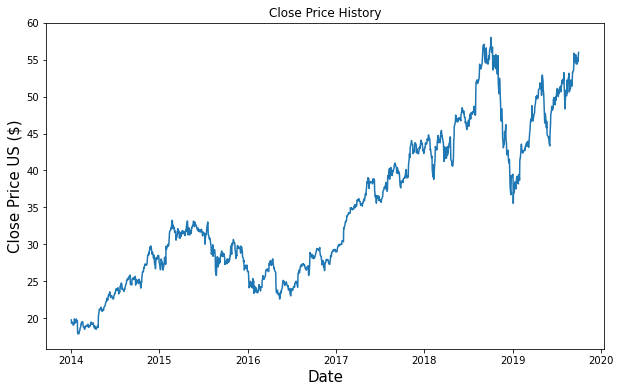

In [6]:
from arima_utils.data_gathering import get_data
df = get_data('AAPL')

## stationarity tests


Dickey-Fuller test results

Test Statistic      -0.624573
p-value              0.865332
# of lags            9.000000
# of obs          1436.000000
dtype: float64
Critical value at 1%: -3.43491
Critical value at 5%: -2.86355
Critical value at 10%: -2.56784


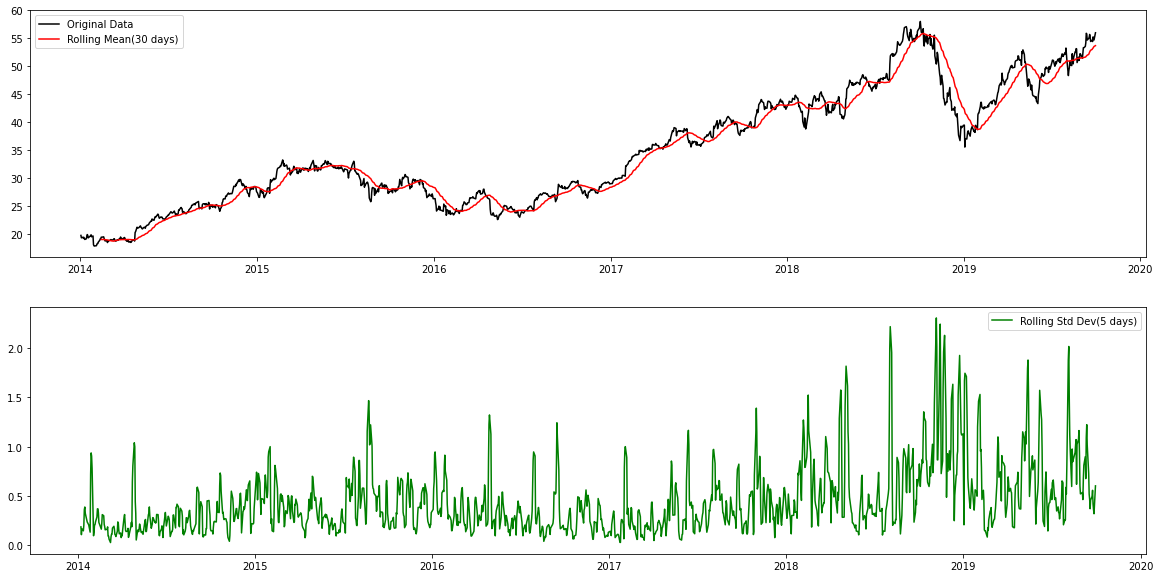

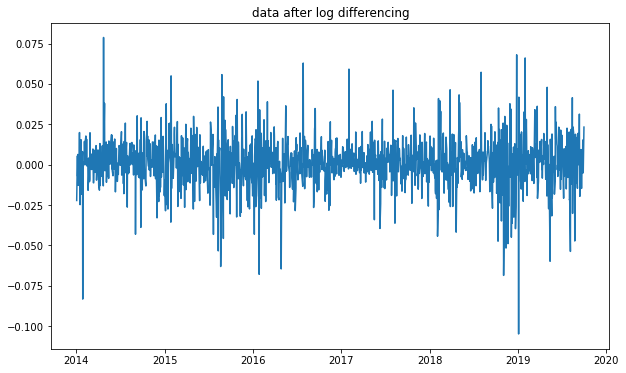

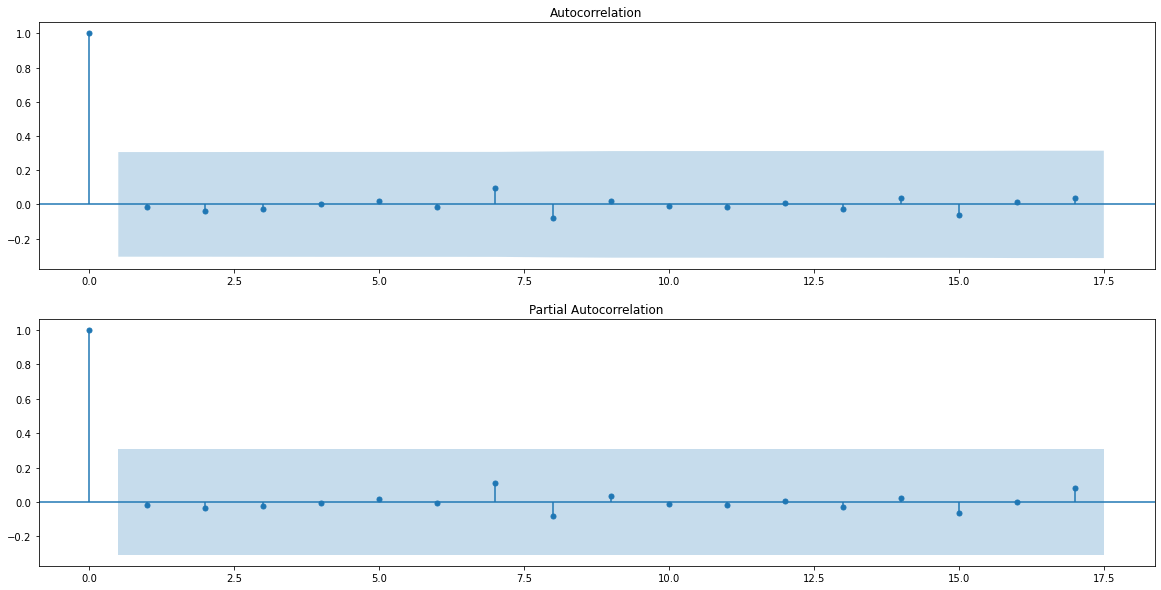

In [7]:
import warnings
warnings.filterwarnings("ignore")
from arima_utils.stationarity_tests import rolling_stats
rolling_stats(df)
from arima_utils.stationarity_tests import dickey_fuller
dickey_fuller(df)
from arima_utils.stationarity_tests import log_diff
log_diff(df)
from arima_utils.stationarity_tests import auto_correlation
auto_correlation(df)


## searching for best ARIMA order


In [8]:
warnings.filterwarnings("ignore")
# evaluate parameters
p_values = range(0, 3)
d_values = range(0, 3)
q_values = range(0, 3)
from arima_utils.best_model import evaluate_models
best_model = evaluate_models(df, p_values, d_values, q_values)

ARIMA(0, 0, 0) MSE=251.034
ARIMA(0, 0, 1) MSE=67.188
ARIMA(0, 1, 0) MSE=0.655
ARIMA(0, 1, 1) MSE=0.657
ARIMA(0, 1, 2) MSE=0.657
ARIMA(0, 2, 0) MSE=1.310
ARIMA(0, 2, 1) MSE=0.659
ARIMA(0, 2, 2) MSE=0.661
ARIMA(1, 0, 0) MSE=0.657
ARIMA(1, 1, 0) MSE=0.657
ARIMA(1, 1, 1) MSE=0.657
ARIMA(1, 1, 2) MSE=0.658
ARIMA(1, 2, 0) MSE=1.022
ARIMA(1, 2, 1) MSE=0.661
ARIMA(2, 0, 0) MSE=0.660
ARIMA(2, 1, 0) MSE=0.657
ARIMA(2, 1, 1) MSE=0.658
ARIMA(2, 1, 2) MSE=0.674
ARIMA(2, 2, 0) MSE=0.896
ARIMA(2, 2, 1) MSE=0.662
Best ARIMA(0, 1, 0) MSE=0.655


## using best arima found in making walk-forward predictions

predicted=39.267956, expected=39.970001
predicted=39.991191, expected=40.117500
predicted=40.138823, expected=39.939999
predicted=39.961113, expected=38.994999
predicted=39.015104, expected=39.062500
predicted=39.082654, expected=39.042500
predicted=39.062612, expected=39.275002
predicted=39.295335, expected=39.102501
predicted=39.122634, expected=39.352501
predicted=39.372873, expected=40.762501
predicted=40.784316, expected=41.680000
predicted=41.702744, expected=42.259998
predicted=42.283320, expected=41.722500
predicted=41.745241, expected=42.027500
predicted=42.050533, expected=43.125000
predicted=43.149143, expected=43.562500
predicted=43.587070, expected=43.702499
predicted=43.727188, expected=44.060001
predicted=44.085033, expected=43.970001
predicted=43.994914, expected=43.667500
predicted=43.692076, expected=43.492500
predicted=43.516872, expected=42.834999
predicted=42.858671, expected=42.270000
predicted=42.293069, expected=42.775002
predicted=42.798564, expected=42.537498


predicted=56.288592, expected=56.907501
predicted=56.939121, expected=57.090000
predicted=57.121748, expected=56.717499
predicted=56.748903, expected=55.775002
predicted=55.805579, expected=55.325001
predicted=55.355171, expected=54.582500
predicted=54.612016, expected=55.962502
predicted=55.993160, expected=55.267502
predicted=55.297547, expected=56.602501
predicted=56.633649, expected=55.959999
predicted=55.990578, expected=54.470001
predicted=54.499297, expected=54.560001
predicted=54.589348, expected=54.592499
predicted=54.621848, expected=55.007500
predicted=55.037174, expected=54.415001
predicted=54.444152, expected=55.197498
predicted=55.227282, expected=55.547501
predicted=55.577553, expected=55.105000
predicted=55.134656, expected=56.237499
predicted=56.268080, expected=56.435001
predicted=56.465722, expected=56.814999
predicted=56.846011, expected=57.320000
predicted=57.351409, expected=58.017502
predicted=58.049467, expected=56.997501
predicted=57.028589, expected=56.072498


predicted=50.269128, expected=50.119999
predicted=50.141519, expected=52.242500
predicted=52.265509, expected=50.687500
predicted=50.709392, expected=50.435001
predicted=50.456699, expected=51.625000
predicted=51.647523, expected=52.587502
predicted=52.610689, expected=52.590000
predicted=52.613173, expected=53.160000
predicted=53.183558, expected=53.115002
predicted=53.138511, expected=50.660000
predicted=50.681764, expected=51.622501
predicted=51.644928, expected=51.040001
predicted=51.062002, expected=51.382500
predicted=51.404726, expected=52.252499
predicted=52.275320, expected=52.185001
predicted=52.207760, expected=51.424999
predicted=51.447208, expected=52.297501
predicted=52.320306, expected=53.320000
predicted=53.343505, expected=53.314999
predicted=53.338484, expected=53.542500
predicted=53.566127, expected=54.174999
predicted=54.199053, expected=55.897499
predicted=55.922739, expected=55.772499
predicted=55.797634, expected=54.687500
predicted=54.711860, expected=54.974998


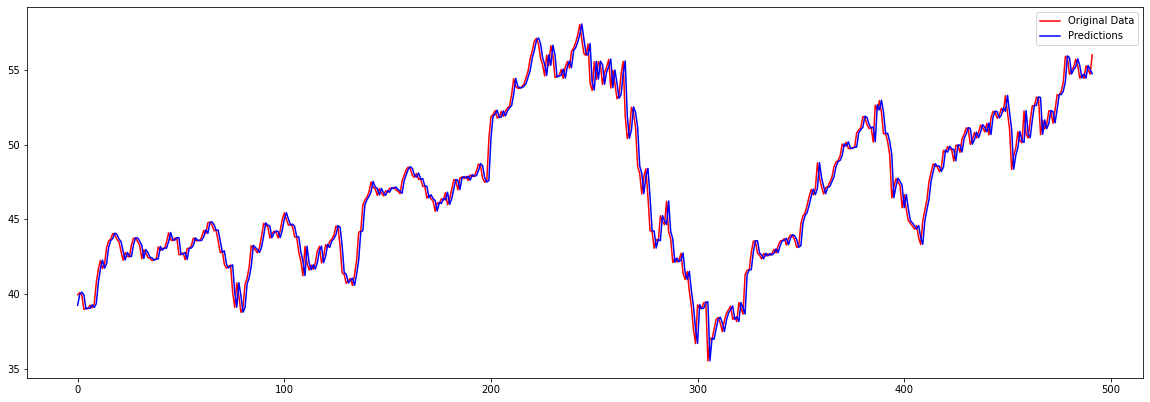

In [9]:
from arima_utils.predictions import one_step_prediction
predictions_series, test = one_step_prediction(df, best_model)

## accuracy metrics


In [10]:
from arima_utils.predictions import accuracy_metrics
accuracy_metrics(predictions_series, test)

mape value -->  0.5780686634974493
mse value -->  0.6551865250442307
rmse value -->  0.8094359301663293
